<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/PROJECT_bike_station/blob/master/02_%EC%9D%B8%EA%B5%AC%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROJECT: (고양시) 공공자전거 스테이션 최적 위치 선정***

**1. 데이터 분석 진행상황(8월 28일)**

**- 대중교통 이용 데이터 분석 결과**

    + 버스 / 지하철 역별 인구과밀집 지역 데이터로 특정 지역에 인구 과밀집 
    + 해당 과밀집 지역에서 점심/퇴근 시간에 공공 자전거 이용률 최다(200번대 정류장)
    + 출근 및 새벽 시간대는 300번대 자전거 정류장 사용 
        
        -> 주거밀집지역 인근으로 예상

        -> 두 시간 대 이용 정류장 차이를 고려할 때 주거 지역 및 인구 밀도 데이터 분석 필요

**2. 향후 데이터 분석 계획 : 인구 데이터**

    + 도시계획(송산동/대화동/장항동)을 고려할 때 비록 현재 이용빈도가 낮을지라도 해당 지역 자전거 스테이션은 필수
    + 도시계획으로 3개 지역 인구 변화 추이
    + 3개 지역 인구밀집 변화 추이

In [2]:
# 구글 드라이브 mount
from google.colab import drive

ROOT="/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/'My Drive'/'고양시'

/content/drive/My Drive/고양시


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##인구통계 변수
- 행정구역: 행정 구역 구분
- 조회기준: 조사한 연/월
- 총인구수: 총 인구 수
- 세대수: 세대 수
- 세대당 인구: 세대당 평균 인구
- 남자 인구수: 남자 총 인구 수
- 여자 인구수: 여자 총 인구 수
- 남여 비율: 남여 비율

# ***고양시 전체 인구***

In [5]:
population = pd.read_csv('07.인구통계.csv') ; population

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 고양시 (4128000000),2017년01월,"1,040,648","402,440",2.59,"511,353","529,295",0.97
1,경기도 고양시 (4128000000),2017년02월,"1,040,483","403,042",2.58,"511,266","529,217",0.97
2,경기도 고양시 (4128000000),2017년03월,"1,040,482","403,443",2.58,"511,182","529,300",0.97
3,경기도 고양시 (4128000000),2017년04월,"1,040,608","403,933",2.58,"511,225","529,383",0.97
4,경기도 고양시 (4128000000),2017년05월,"1,040,892","404,603",2.57,"511,347","529,545",0.97
...,...,...,...,...,...,...,...,...
1579,경기도 고양시 일산서구 송산동(4128759000),2019년08월,"50,610","18,390",2.75,"24,983","25,627",0.97
1580,경기도 고양시 일산서구 송산동(4128759000),2019년09월,"50,694","18,404",2.75,"25,025","25,669",0.97
1581,경기도 고양시 일산서구 송산동(4128759000),2019년10월,"50,660","18,398",2.75,"25,020","25,640",0.98
1582,경기도 고양시 일산서구 송산동(4128759000),2019년11월,"50,865","18,480",2.75,"25,112","25,753",0.98


In [6]:
# 고양시 전체 총 인구 변화 추이

population_all = population.loc[population['행정구역'].str.contains('4128000000', na=False)]
population_all

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 고양시 (4128000000),2017년01월,"1,040,648","402,440",2.59,"511,353","529,295",0.97
1,경기도 고양시 (4128000000),2017년02월,"1,040,483","403,042",2.58,"511,266","529,217",0.97
2,경기도 고양시 (4128000000),2017년03월,"1,040,482","403,443",2.58,"511,182","529,300",0.97
3,경기도 고양시 (4128000000),2017년04월,"1,040,608","403,933",2.58,"511,225","529,383",0.97
4,경기도 고양시 (4128000000),2017년05월,"1,040,892","404,603",2.57,"511,347","529,545",0.97
5,경기도 고양시 (4128000000),2017년06월,"1,041,375","405,641",2.57,"511,587","529,788",0.97
6,경기도 고양시 (4128000000),2017년07월,"1,041,587","406,314",2.56,"511,575","530,012",0.97
7,경기도 고양시 (4128000000),2017년08월,"1,041,507","406,768",2.56,"511,486","530,021",0.97
8,경기도 고양시 (4128000000),2017년09월,"1,041,399","407,272",2.56,"511,328","530,071",0.96
9,경기도 고양시 (4128000000),2017년10월,"1,041,706","407,871",2.55,"511,397","530,309",0.96


In [21]:
# 인구 추이 변화를 보기 위해 시각화
# '총인구수'가 object이기에 float로 변환
# 빠른 계산을 위해 ','제거

population['총인구수']=population['총인구수'].str.replace(',','').astype(float)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text

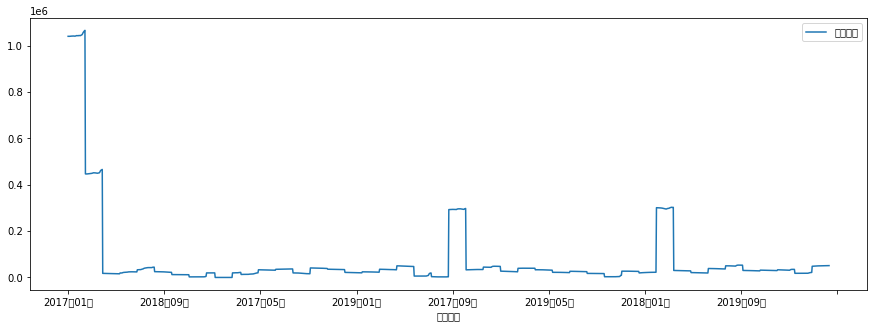

In [23]:
population.plot(x='조회기준', y='총인구수', kind='line', figsize=(15,5))

## ***도시계획 진행 중인 지역(송산/대화/장항) 인구***

### 1.송산동

In [18]:
population_song=population.loc[population['행정구역'].str.contains('송산', na=False)]
#na 파라미터의 역할 : 결측치 채우기

population_song

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1548,경기도 고양시 일산서구 송산동(4128759000),2017년01월,"48,294","16,855",2.87,"23,893","24,401",0.98
1549,경기도 고양시 일산서구 송산동(4128759000),2017년02월,"48,456","16,938",2.86,"23,995","24,461",0.98
1550,경기도 고양시 일산서구 송산동(4128759000),2017년03월,"48,619","17,002",2.86,"24,060","24,559",0.98
1551,경기도 고양시 일산서구 송산동(4128759000),2017년04월,"48,837","17,080",2.86,"24,158","24,679",0.98
1552,경기도 고양시 일산서구 송산동(4128759000),2017년05월,"48,955","17,146",2.86,"24,216","24,739",0.98
1553,경기도 고양시 일산서구 송산동(4128759000),2017년06월,"49,045","17,198",2.85,"24,273","24,772",0.98
1554,경기도 고양시 일산서구 송산동(4128759000),2017년07월,"49,085","17,216",2.85,"24,270","24,815",0.98
1555,경기도 고양시 일산서구 송산동(4128759000),2017년08월,"49,104","17,221",2.85,"24,282","24,822",0.98
1556,경기도 고양시 일산서구 송산동(4128759000),2017년09월,"49,307","17,310",2.85,"24,376","24,931",0.98
1557,경기도 고양시 일산서구 송산동(4128759000),2017년10월,"49,473","17,407",2.84,"24,437","25,036",0.98


In [19]:
# 송산동 인구 추이 변화를 보기 위해 시각화
# '총인구수'가 object이기에 float로 변환
# 빠른 계산을 위해 ','제거

population_song['총인구수']=population_song['총인구수'].str.replace(',','').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text

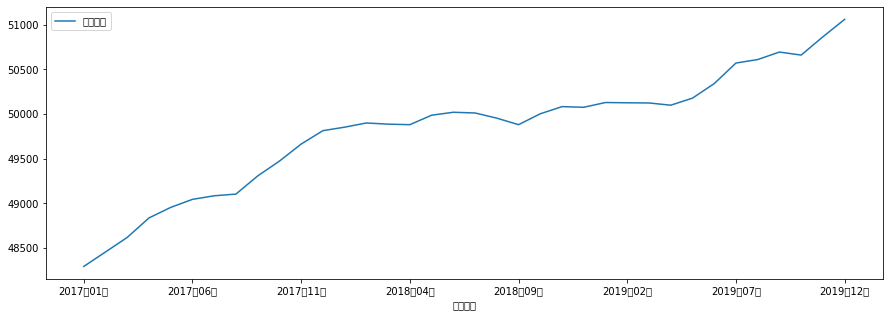

In [20]:
# 송산 인구변화 추이
population_song.plot(x='조회기준', y='총인구수', kind='line', figsize=(15,5))

In [24]:
#대화동
population_dae=population.loc[population['행정구역'].str.contains('대화', na=False)]
population_dae

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1476,경기도 고양시 일산서구 대화동(4128757000),2017년01월,33108.0,"13,781",2.40,"16,042","17,066",0.94
1477,경기도 고양시 일산서구 대화동(4128757000),2017년02월,33053.0,"13,767",2.40,"16,004","17,049",0.94
1478,경기도 고양시 일산서구 대화동(4128757000),2017년03월,33047.0,"13,790",2.40,"15,984","17,063",0.94
1479,경기도 고양시 일산서구 대화동(4128757000),2017년04월,32940.0,"13,745",2.40,"15,949","16,991",0.94
1480,경기도 고양시 일산서구 대화동(4128757000),2017년05월,32870.0,"13,742",2.39,"15,907","16,963",0.94
1481,경기도 고양시 일산서구 대화동(4128757000),2017년06월,32827.0,"13,800",2.38,"15,878","16,949",0.94
1482,경기도 고양시 일산서구 대화동(4128757000),2017년07월,32836.0,"13,829",2.37,"15,842","16,994",0.93
1483,경기도 고양시 일산서구 대화동(4128757000),2017년08월,32763.0,"13,807",2.37,"15,793","16,970",0.93
1484,경기도 고양시 일산서구 대화동(4128757000),2017년09월,32697.0,"13,793",2.37,"15,755","16,942",0.93
1485,경기도 고양시 일산서구 대화동(4128757000),2017년10월,32615.0,"13,793",2.36,"15,733","16,882",0.93


In [32]:
# 데이터 타입 변경
population_dae['총인구수'] = population_dae['총인구수'].astype(int)
population_dae['총인구수'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1476    33108
1477    33053
1478    33047
1479    32940
1480    32870
Name: 총인구수, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text

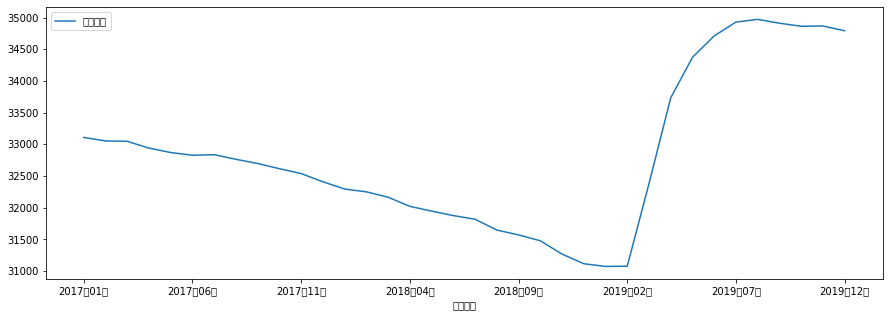

In [33]:
population_dae.plot(x='조회기준', y='총인구수', kind='line', figsize=(15,5))